<a href="https://colab.research.google.com/github/bandpooja/AI_based_projects/blob/main/Startup_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Supervised ML-Algorithms

### PART - 1

</center>

In this notebook we will be learning basic implementation of **kNN**, **Decision Tree** and **Random Forest** algorithms, on a randomly prepared dataset. 

We will start by importing the modules necessay for this implementation.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Classification

We will first implement these algorithms for a classification task on a randomly generated dataset. Uisng making blobs to generate a randomly spread dataset around different clusters.

For this example we have **four** randomly selected cluster centers and the points are spread around it with some standard deviation so that there is some overlap between the points. We are using a **2-D** sample point **x**, just because things are easy to visualize in 2-dimensions.

In [8]:
# generating the dataset
x, y= make_blobs(n_samples=1000, n_features=2,
                 centers=[(2,4),(2,2),(1,5),(3,1)],
                 cluster_std=0.5)

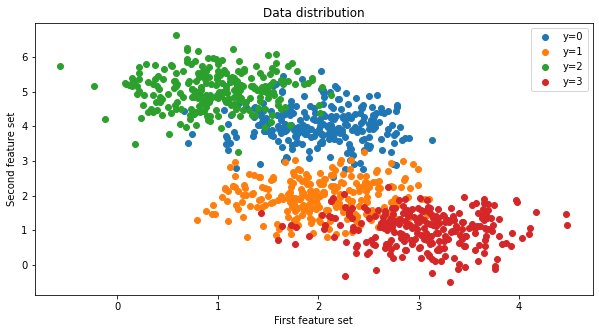

In [20]:
# visualizing the dataset
plt.figure(figsize=(10, 5))
ys = np.unique(y)
for y_ in ys:
  ix_ = np.where(y==y_)
  plt.scatter(x[ix_, 0], x[ix_, 1], label=f'y={y_}')
plt.legend()
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Data distribution')
plt.show()

Splitting the data in **train**, **validation** and **test** set

Using **train** to *fit* the model and using **validation** to *tune the hyperparameters* and then making the *final generalization analysis* on the **test** set.

In [10]:
# splitting 80% of data for training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# splitting the rest 20% into 10% for validation and 10% for test
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5)

### kNNCalssifer

In **kNN classifier** the main *hyperpaprameter* that we want to tune is **k**(the number of *nearest neighbors*) to consider for the test point's label. 

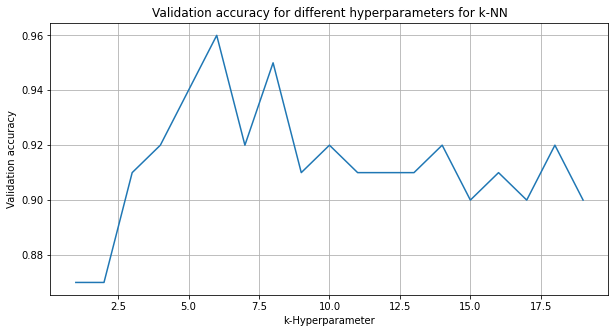

In [15]:
'''
 we read that k <= sqrt(N) we have 800 points so our k should be less than 28,
 we will iterate through k's from 1-20
'''

ks_ = []
val_score = []

for k in range(1, 20):
  model=KNeighborsClassifier(n_neighbors=k)
  model.fit(x_train, y_train)
  ks_.append(k)
  val_score.append(model.score(x_val, y_val))

plt.figure(figsize=(10, 5))
plt.plot(ks_, val_score)
plt.grid()
plt.xlabel('k-Hyperparameter')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy for different hyperparameters for k-NN')
plt.show()

We see that the **maximum** *validation-accuracy* is achieved for **k=6**, therefore using k=6 as the final hyperparameter fo the model and seeing its performance on the test set.

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {knn_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {knn_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.9175
Test accuracy-score of the model 0.85


Lets plot the confusion matrix of the final kNN classifier

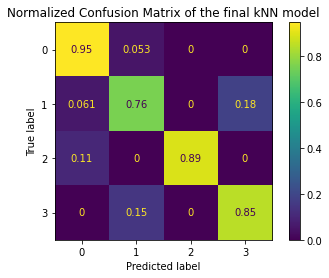

In [39]:
plot_confusion_matrix(knn_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final kNN model')
plt.show()

Wohoo!! our kNN is **85%** aacuarate. Lets wrap this up by plotting the decision boundary of the *kNN-model*.

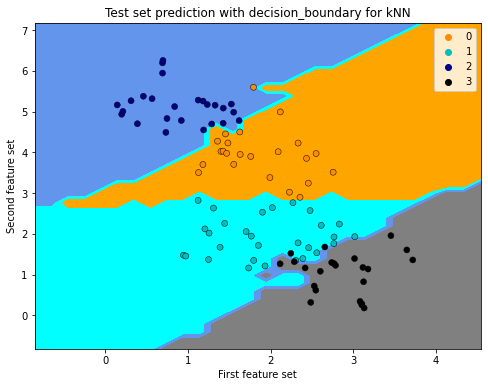

In [50]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'gray'])
cmap_bold = ['darkorange', 'c', 'darkblue', 'black']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = knn_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=knn_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (6, 'uniform'))
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for kNN')
plt.show()

### DecisionTreeCalssifer

In **DecisionTreeclassifier** the main hyperpaprameter that we want to tune is **depth** of the tree and the **criterion for split**(`'gini'`, `'entropy'`) at each node. 

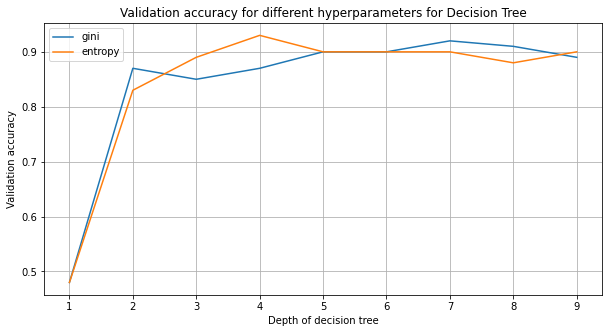

In [32]:
'''
 Iterating over depth from range 0-10 to see underfitting and 
 overfitting (not evidently visible because the model's depth doesn't increase beyond
 a certain depth because of the number of points in the training set).
 Using two different split criterion.
'''

plt.figure(figsize=(10, 5))

for criterion in ['gini', 'entropy']:
  depths_ = []
  val_score = []
  for depth in range(1, 10):
    model=DecisionTreeClassifier(criterion=criterion,max_depth=depth)
    model.fit(x_train, y_train)
    depths_.append(depth)
    val_score.append(model.score(x_val, y_val))
  
  plt.plot(depths_, val_score, label=criterion)

plt.legend()
plt.grid()
plt.xlabel('Depth of decision tree')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy for different hyperparameters for Decision Tree')
plt.show()

As we can see **split criterion of entropy** at **depth four** is giving the best model accuacy so we will use that as our final model.

In [35]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {dt_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {dt_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.91125
Test accuracy-score of the model 0.86


Lets plot the confusion matrix for the test predictions of the model.

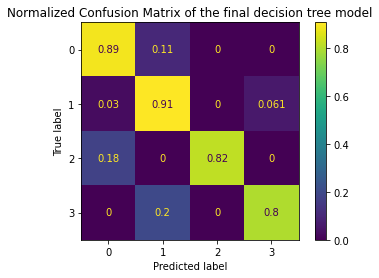

In [38]:
plot_confusion_matrix(dt_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final decision tree model')
plt.show()

Wohoo!! our Decision-Tree is **86%** aacuarate. Lets wrap this up by plotting the decision boundary of the *Decision-Tree*.

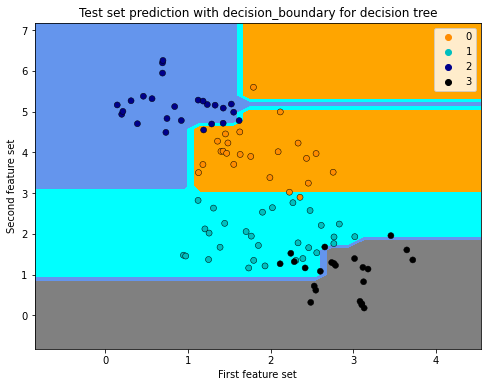

In [49]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'gray'])
cmap_bold = ['darkorange', 'c', 'darkblue', 'black']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=knn_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (6, 'uniform'))
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for decision tree')
plt.show()

### RandomForestCalssifer

**Random foreset**, is just an *bagging ensemble* of *decision trees* with each decision tree in the forest getting different combination of feature and random state to split from. 

(**The apporach is very useful to reduce overfitting which is a very common problem for the Decision-Tree model because they can universaly approximate any function given they have sufficient depth.**)

The main **hyper parameters** for random-forest are the depth and split criterion because each model in a forest is a decision tree. But more important **hyper parameter**, is the **number of estimators** in the forest (which means how many decision trees are there in the random forest). Usually how we tune hyper parameters for RandomForest is that we try the find the best number of estimator, so that the model is not-too complex for different hyperparameter combination.

---

*(**Note**: As the number of estimator in a forest increase the test or val accuracy of the model increases till some time after which the number of estimators become too big and the new estimator are similar to some of the existing estimator in the bag.)*

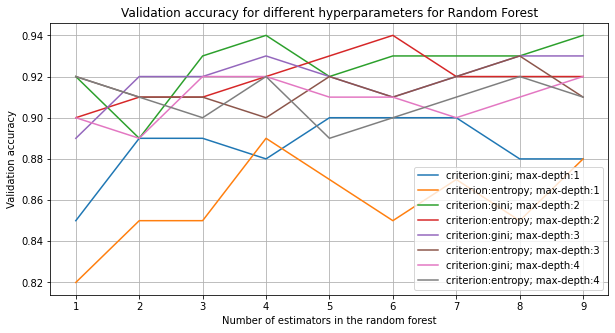

In [43]:
'''
 Iteration over number of estimators from 1-100 in steps of 10
 Iterating over depth from range 1-10 in interval of 2.
 Using two different split criterion.
'''

plt.figure(figsize=(10, 5))

for max_depth in range(1, 5):
  for criterion in ['gini', 'entropy']:
    estimators_ = []
    val_score = []
    for n_est in range(1, 10):
      model=RandomForestClassifier(n_estimators=n_est*10, criterion=criterion,
                                   max_depth=max_depth*2)
      model.fit(x_train, y_train)
      estimators_.append(n_est*10)
      val_score.append(model.score(x_val, y_val))
  
    plt.plot(depths_, val_score, label=f'criterion:{criterion}; max-depth:{max_depth}')

plt.legend()
plt.grid()
plt.xlabel('Number of estimators in the random forest')
plt.ylabel('Validation accuracy')
plt.title('Validation accuracy for different hyperparameters for Random Forest')
plt.show()

The best validation accuracy is reached by using the split **criterion** as `gini` and **max_depth** as `2`, with 4 estimators. Therefore using this combination for the final model, selecting this out of others reaching the same accuracy because its the **simplest/least-complex** (*least number of estimators and least max_depth, of all the other hyper-parameter combinations reaching the same validation accuracy*).

In [44]:
rf_model = RandomForestClassifier(criterion='gini', max_depth=2, n_estimators=4)
rf_model.fit(x_train, y_train)

print(f'Training accuracy-score of the model {rf_model.score(x_train, y_train)}')
print(f'Test accuracy-score of the model {rf_model.score(x_test, y_test)}')

Training accuracy-score of the model 0.8325
Test accuracy-score of the model 0.84


Lets plot the confusion matrix for the test predictions of the model.

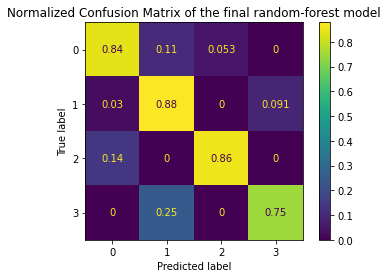

In [46]:
plot_confusion_matrix(rf_model, x_test, y_test, normalize='true')
plt.title('Normalized Confusion Matrix of the final random-forest model')
plt.show()

Wohoo!! our Random-Forest is 84% aacuarate. Lets wrap this up by plotting the decision boundary of the **Random-Forest**.


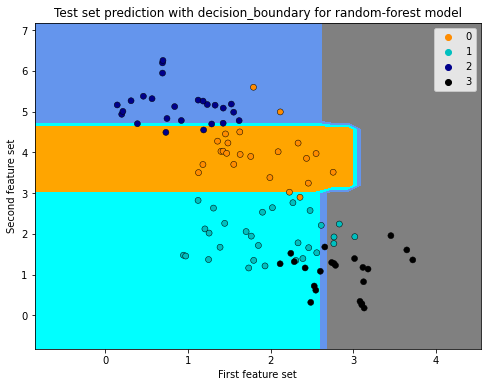

In [48]:
# defining a mesh a predicting on each step in the mesh 

h = 0.2 # step size for mesh grid points
# color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue', 'gray'])
cmap_bold = ['darkorange', 'c', 'darkblue', 'black']

x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = rf_model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=knn_model.predict(x_test),
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (6, 'uniform'))
plt.xlabel('First feature set')
plt.ylabel('Second feature set')
plt.title('Test set prediction with decision_boundary for random-forest model')
plt.show()

## Regression

To be added later

In [51]:
#END